In [1]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import ScalarFormatter,FormatStrFormatter
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer
import datetime

In [2]:
#read json
portfolio = pd.read_json(r'C:\Desktop\portfolio.json', orient='records', lines=True)
profile = pd.read_json(r'C:\Desktop\profile.json', orient='records', lines=True)
transcript = pd.read_json(r'C:\Desktop\transcript.json', orient='records', lines=True)

In [3]:
df=pd.DataFrame(transcript['value'].values.tolist(),index=transcript.index)

In [4]:
transcript=transcript.merge(df,left_index=True, right_index=True)

In [5]:
#one hot encode channels
mlb = MultiLabelBinarizer()
channel = pd.DataFrame(mlb.fit_transform(portfolio['channels']),columns=mlb.classes_, index=portfolio.index)

In [6]:
portfolio=portfolio.merge(channel,left_index=True, right_index=True)

In [7]:
transcript=transcript.merge(portfolio, left_on='offer_id', right_on='id', how='left')

In [8]:
customer_tenure=transcript.merge(profile, left_on='person', right_on='id', how='left')

In [9]:
d = datetime.datetime.now()  # Some datetime object.
customer_tenure['today']=d.strftime('%Y-%m-%d')

In [10]:
customer_tenure['became_member_on'] = pd.to_datetime(customer_tenure['became_member_on'], format='%Y%m%d')

In [11]:
import datetime as dt
customer_tenure['customer_tenure_in_days'] = (pd.to_datetime(customer_tenure.today) - pd.to_datetime(customer_tenure.became_member_on)).dt.days

In [12]:
customer_tenure['customer_tenure_in_years']=customer_tenure['customer_tenure_in_days']/365

In [13]:
unique_customers=customer_tenure.groupby(['person'])['customer_tenure_in_years'].mean().reset_index()

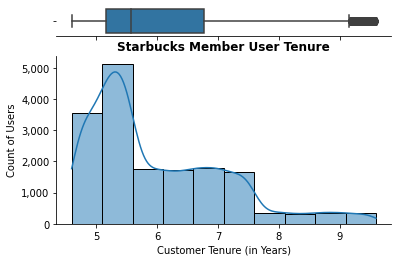

In [14]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(x=unique_customers['customer_tenure_in_years'], ax=ax_box)
sns.histplot(data=unique_customers,x='customer_tenure_in_years',
             bins=10, kde=True, 
             ax=ax_hist)

ax_box.set_xlabel('')

sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)
ax_hist.set(xlabel='Customer Tenure (in Years)')
ax_hist.set(ylabel='Count of Users')
ax_hist.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.title('Starbucks Member User Tenure',fontweight="bold")
plt.show()